# Выделение сообществ

Материалы:
* Макрушин С.В. "Лекция 3: Выделение сообществ"
* Документация:
    * https://networkx.org/documentation/stable/reference/algorithms/community.html
    * https://networkx.org/documentation/stable/reference/generated/networkx.linalg.graphmatrix.adjacency_matrix.html
    * https://networkx.org/documentation/networkx-1.10/reference/generators.html
    * https://seaborn.pydata.org/generated/seaborn.heatmap.html

## Плотность и модулярность

(0.46499999999999997, 0.22)

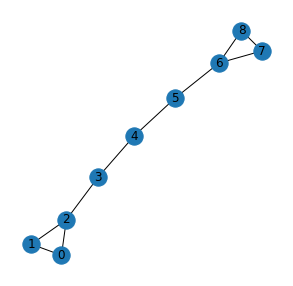

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import networkx.algorithms.community as nx_comm
from networkx.algorithms.community.centrality import girvan_newman
import random
from collections import Counter

G = nx.barbell_graph(3, 3)
fig, ax = plt.subplots(figsize=(5, 5))
nx.draw(G, ax=ax, with_labels=True)

communities1 = [{0, 1, 2}, {3, 4, 5}, {6, 7, 8}]
communities2 = [{0, 1, 2, 6, 7, 8}, {3, 4, 5}]

(nx.density(G.subgraph(communities1[0])),
nx.density(G.subgraph(communities1[1])))

(nx.density(G.subgraph(communities2[0])),
 nx.density(G.subgraph(communities2[1])))

nx_comm.modularity(G, communities1), nx_comm.modularity(G, communities2)

1.1 Взять сеть размером от 15 до 40 узлов и создать не менее 5 разбиений этой сети на 2 сообщества (часть разбиений должны частично или полностью соответствовать интуитивным представлениям о разбиении на сообщества, часть - нет). Визуализировать результаты.

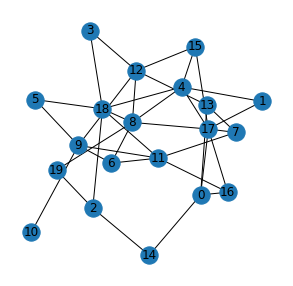

In [88]:
G = nx.gnm_random_graph(20, 36)
fig, ax = plt.subplots(figsize=(5, 5))
nx.draw(G, ax=ax, with_labels=True)

In [89]:
len(G)

20

In [105]:
# решение для другого графа
# listt1 = [1]
# listt2 = [34]
# for i in G.edges:
#     t = list(i)
#     if int(t[0]) == 1:
#         listt1.append(int(t[1]))
# for i in G.edges:
#     t = list(i)
#     if int(t[1]) == 34:
#         if int(t[0]) in listt1:
#             continue
#         else:
#             listt2.append(int(t[0]))
# print(listt1, listt2)
# len(listt1)+len(listt2)

In [100]:
communities1 = [{6,19,2,1,16,17,0,10,3,9}, {4,14,12,18,13,15,5,7,8,11}]
communities2 = [{6,19,2,1,16,17,0,10}, {4,14,12,18,13,15,5,7,8,11,3,9}]
communities3 = [{6,19,2,1,16,17,0,10,3,9,13,7}, {4,14,12,18,15,5,8,11}]
communities4 = [{6,19,2,1,16,17,0,10,3,9,4,14,12}, {18,13,15,5,7,8,11}]
communities5 = [{6,19,2,1,16,17,0,10}, {4,14,12,18,13,15,5,7,8,11,3,9,4}]

In [101]:
print(nx.density(G.subgraph(communities1[0])),
nx.density(G.subgraph(communities1[1])))

print(nx.density(G.subgraph(communities2[0])),
nx.density(G.subgraph(communities2[1])))

print(nx.density(G.subgraph(communities3[0])),
nx.density(G.subgraph(communities3[1])))

print(nx.density(G.subgraph(communities4[0])),
nx.density(G.subgraph(communities4[1])))

print(nx.density(G.subgraph(communities5[0])),
nx.density(G.subgraph(communities5[1])))

0.15555555555555556 0.24444444444444444
0.17857142857142858 0.24242424242424243
0.15151515151515152 0.2857142857142857
0.16666666666666666 0.23809523809523808
0.17857142857142858 0.24242424242424243


In [102]:
, nx_comm.modularity(G, communities2),nx_comm.modularity(G, communities3), nx_comm.modularity(G, communities4), nx_comm.modularity(G, communities5))

('nx_comm.modularity(G,',
 'communities2),nx_comm.modularity(G,',
 'communities3),',
 'nx_comm.modularity(G,',
 'communities4),',
 'nx_comm.modularity(G,',
 'communities5))')

In [104]:
print(nx_comm.modularity(G, communities1), nx_comm.modularity(G, communities2),nx_comm.modularity(G, communities3), nx_comm.modularity(G, communities4), nx_comm.modularity(G, communities5))

-0.006172839506172784 0.03665123456790123 -0.0015432098765431612 -0.024691358024691357 0.03665123456790123


1.2 Для разбиений из 1.1 и всей сети рассчитать плотность и модулярность.

## Алгоритм Гирвана-Ньюмена. Лувенский алгоритм.

2.1 Считать сеть из файла `communities.edgelist`. Выполнить разбиение сети на 2 сообщества с помощью алгоритма Гирвана-Ньюмена. Визуализировать результат, раскрасив узлы в цвет, соответствующий их сообществу.

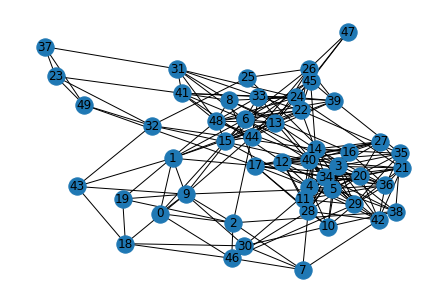

In [194]:
G1 = nx.read_edgelist('communities.edgelist', comments = '%'); nx.draw(G1, with_labels=True)

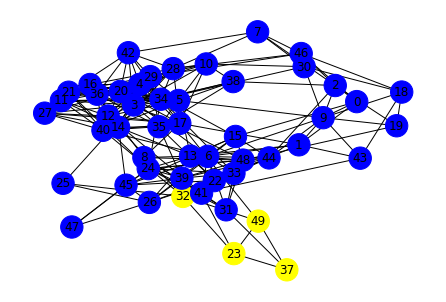

In [138]:
color_map = []
for node in G1:
    if node in abc[0]:
        color_map.append('yellow')
    elif node in abc[1]: 
        color_map.append('blue')   
nx.draw(G1, node_color=color_map, node_size = 500, with_labels=True)
plt.show()

###### 2.2 Показать график динамики модулярности для шагов алгоритма алгоритма Гирвана-Ньюмена и визуализировать разбиение сети из 2.1 при наилучшей модулярности. Для визуализации требуется выбрать несколько цветов (в соответствии с количеством выделенных сообществ) и раскрасить узлы и связи в рамках одного сообщества этими цветами. Связи между узлами, состоящими в разных сообществах, отрисовать черным цветом. 

In [157]:
comp = girvan_newman(G1)
ablist1 = [0]
for i in range(100):
    aa = list(sorted(c) for c in next(comp))
    ab = nx_comm.modularity(G1, aa)
    ablist1.append(ab)
    print(aa, len(aa), ab)

[['23', '32', '37', '49'], ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '24', '25', '26', '27', '28', '29', '3', '30', '31', '33', '34', '35', '36', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '5', '6', '7', '8', '9']] 2 0.04319915980795615
[['23', '32', '37', '49'], ['10', '11', '12', '13', '14', '15', '16', '17', '20', '21', '22', '24', '25', '26', '27', '28', '29', '3', '31', '33', '34', '35', '36', '38', '39', '4', '40', '41', '42', '44', '45', '47', '48', '5', '6', '8'], ['0', '1', '18', '19', '2', '30', '43', '46', '7', '9']] 3 0.18639617626886154
[['23', '32', '37', '49'], ['13', '15', '22', '24', '25', '26', '31', '33', '39', '41', '44', '45', '47', '48', '6', '8'], ['10', '11', '12', '14', '16', '17', '20', '21', '27', '28', '29', '3', '34', '35', '36', '38', '4', '40', '42', '5'], ['0', '1', '18', '19', '2', '30', '43', '46', '7', '9']] 4 0.4315950788751715
[['23', '32', '37', '49'], ['13', '15', '22'

StopIteration: 

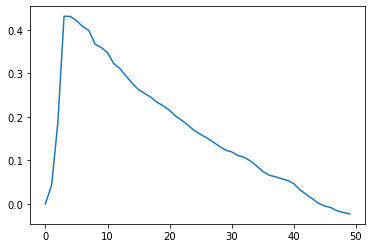

In [163]:
X = range(50)
plt.plot(X, ablist1)

In [252]:
comp = girvan_newman(G1)
aalist = []
ablist = [0]
length = []
while True:
    aa = list(sorted(c) for c in next(comp))
    length.append(len(aa))
    aalist.append(aa)
    ab = nx_comm.modularity(G1, aa)
    if ab>ablist[-1]:
        ablist.append(ab)
    else:
        break

In [253]:
#наилучшая модулярность
print(ablist[-1])
#количество шагов к наилучшей модулярности
print(length[-1])
#получившиеся сообщества
print(aalist[-1])

0.4315950788751715
5
[['23', '32', '37', '49'], ['13', '15', '22', '24', '26', '31', '33', '39', '41', '44', '45', '47', '48', '6', '8'], ['10', '11', '12', '14', '16', '17', '20', '21', '27', '28', '29', '3', '34', '35', '36', '38', '4', '40', '42', '5'], ['25'], ['0', '1', '18', '19', '2', '30', '43', '46', '7', '9']]


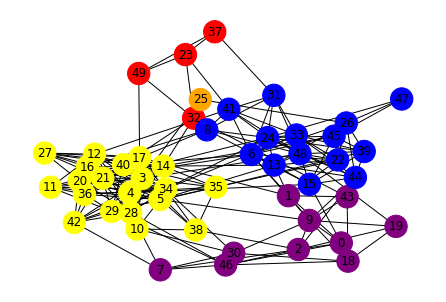

In [254]:
color_map = []
colors1 = ['red', 'blue', 'yellow', 'orange', 'purple']
colors2 = ['red', 'blue', 'yellow', 'purple']
for node in G1:
    for i in range(length[-1]):
        if node in aalist[-1][i]:
            color_map.append(colors[i])
nx.draw(G1, node_color=color_map, node_size = 500, with_labels=True)

2.3 Выполнить разбиение сети из 2.1 на сообщества с помощью Лувенского алгоритма. Визуализировать результат аналогично заданию 2.2.

In [213]:
import community.community_louvain
import matplotlib.cm as cm

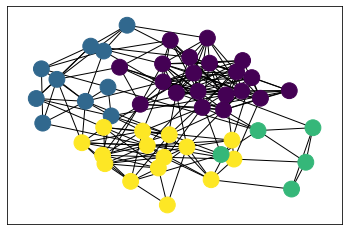

In [224]:
luvv = community.community_louvain.best_partition(G1)
pos = nx.kamada_kawai_layout(G1)
nx.draw_networkx_nodes(G1, pos, luvv.keys(), node_size=250, node_color=list(luvv.values()))
nx.draw_networkx_edges(G1, pos)
plt.show()

2.4 Визуализировать матрицу смежности сети из 2.1 при помощи `sns.heatmap`. Получить и визуализировать матрицу смежности для сети, в которой узлы перенумерованы в порядке возрастания номера сообщества, которому они принадлежат (т.е. номера $0...C_1-1$ даются $C_1$ узлам, принадлежащим первому сообществу; номера $C_1...C_2-1$ даются $C_2$ узлам, принадлежащим второму сообществу и т.д.)

2.5 $(*)$ Создать собственную реализацию алгоритма Гирвана-Ньюмена. Для нее выполнить визуализацию результата алгоритма.

## "Дискретный" алгоритм распространения меток

3.1. Визуализировать разбиение сети карате клуба на сообщества с помощью реализации алгоритма распространения меток из `networkx`.

In [2]:
G2 = nx.read_edgelist('./ucidata-zachary/out.ucidata-zachary', comments = '%')

In [246]:
from networkx.algorithms import community
abb = community.label_propagation_communities(G2); abb

dict_values([{'11', '2', '22', '8', '12', '20', '1', '13', '14', '18', '4', '5'}, {'32', '15', '16', '3', '26', '21', '25', '31', '24', '27', '19', '28', '9', '34', '30', '10', '29', '33', '23'}, {'6', '7', '17'}])

In [248]:
listt1 = []
for i in range(len(abb)):
    listt1.append(list(list(abb)[i]))

In [249]:
listt1

[['11', '2', '22', '8', '12', '20', '1', '13', '14', '18', '4', '5'],
 ['32',
  '15',
  '16',
  '3',
  '26',
  '21',
  '25',
  '31',
  '24',
  '27',
  '19',
  '28',
  '9',
  '34',
  '30',
  '10',
  '29',
  '33',
  '23'],
 ['6', '7', '17']]

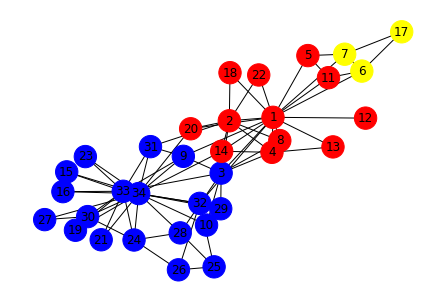

In [255]:
color_map = []
colors = ['red', 'blue', 'yellow']
for node in G2:
    for i in range(len(abb)):
        if node in listt1[i]:
            color_map.append(colors[i])
nx.draw(G2, node_color=color_map, node_size = 500, with_labels=True)

3.2 Реализовать алгоритм распространения меток. Решить с его помощью задачу 3.1. Визуализировать пошаговую динамику распространения меток и итоговое разбиение сети.

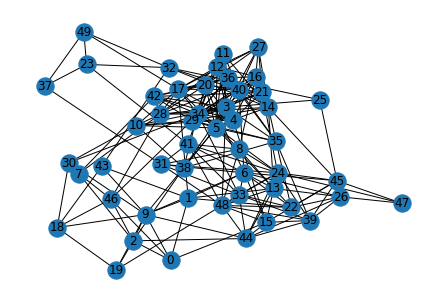

In [322]:
G1 = nx.read_edgelist('communities.edgelist', comments = '%'); nx.draw(G1, with_labels=True)

In [323]:
for i, n in enumerate(G1.nodes):
    G1.nodes[n]['label'] = i
    print(G1.nodes[n]['label'])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [328]:
freqs = Counter(G1.nodes[neighbor]['label'] for neighbor in G1.neighbors('16'))

In [329]:
freqs

Counter({35: 1, 26: 1, 9: 1, 49: 1, 12: 1, 38: 1, 30: 1, 48: 1, 44: 1, 24: 1})

In [330]:
max_freq = max(freqs.values()); max_freq

1

In [331]:
freqs_max = {n: f for n, f in freqs.items() if f == max_freq}

In [332]:
freqs_max

{35: 1, 26: 1, 9: 1, 49: 1, 12: 1, 38: 1, 30: 1, 48: 1, 44: 1, 24: 1}

In [281]:
for i in range(1, len(G1)):
    G1.add_nodes_from([(i, {'label':i})])

In [307]:
print(G1.nodes[6]['label'])

KeyError: 6

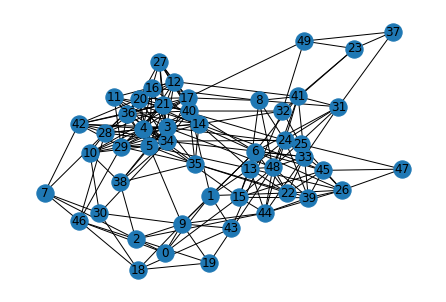

In [318]:
nx.draw(G1, with_labels=True)

In [319]:
for node in G1.nodes:
    print(node, list(G1.neighbors(node)))

37 ['49', '23', '31']
49 ['37', '23', '32', '17']
23 ['37', '49', '32', '41']
31 ['37', '41', '6', '8', '48', '24', '33']
32 ['49', '23', '25', '43', '14', '40']
17 ['49', '1', '8', '34', '27', '40', '12', '10', '28', '36', '20', '4']
41 ['23', '6', '31', '8', '48', '24', '33', '12']
25 ['32', '26', '3']
43 ['32', '9', '18', '1']
14 ['32', '13', '45', '11', '27', '40', '16', '29', '28', '35', '36', '4']
40 ['32', '6', '11', '21', '34', '14', '27', '12', '17', '29', '35', '36', '5']
26 ['25', '13', '6', '44', '47', '45', '39', '22']
3 ['25', '48', '38', '11', '21', '34', '27', '16', '12', '10', '29', '28', '35', '4', '42', '5']
0 ['9', '2', '46', '1', '15']
9 ['0', '18', '30', '43', '2', '19', '1', '6', '44', '5']
2 ['0', '9', '19', '7', '46', '44', '38']
46 ['0', '18', '2', '7', '29', '28']
1 ['0', '9', '43', '13', '6', '22', '17']
15 ['0', '13', '6', '44', '48', '45', '39', '4']
18 ['9', '30', '43', '19', '46']
30 ['9', '18', '7', '34', '10']
19 ['9', '18', '2', '48']
6 ['9', '1', '13

In [3]:
def _label_init(G):
    for i, n in enumerate(G.nodes):
        G.nodes[n]['label'] = i

In [4]:
def _update_label(node, label, G, log=False):
    # label_freq={}
    freqs = Counter(G.nodes[neighbor]['label'] for neighbor in G.neighbors(node))
    max_freq = max(freqs.values())
    if log:
        print(f'распостраненность меток у соседей {node} (label = {label}): {freqs}')
    freqs_max = {n: f for n, f in freqs.items() if f == max_freq}
    if label not in freqs_max.keys():
        G.nodes[node]['label'] = random.choice(list(freqs_max.keys()))
        return true # changed
    else:
        return false # not changed
    changes.append(False)

In [5]:
#Label Propagation Algorithm
def LPA(G, log=False):
    # инициализируем веса:
    for node, data in G2.nodes(data=True):
        _label_init(G)
    changed = True
    while changed:
        if log:
            print(f'очередной шаг ------------------------')
    changed = False
    for node, label in G.nodes(data='label'):
        ch = _update_label(node, label, G, log=log)
        changed = changed or ch

In [9]:
color = {i: "#"+''.join([random.choice('0123456789ABCDEFFFFFFF') for j in range(6)]) for i in range(len(G2.nodes()))}

In [10]:
G2_pos = nx.kamada_kawai_layout(G2)

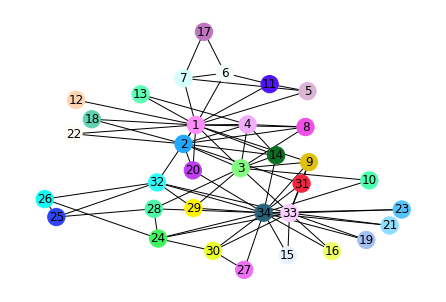

In [12]:
_label_init(G2)
node_color = [color[l] for n, l in G2.nodes(data='label')]
plt.figure()
nx.draw(G2, pos=G2_pos, with_labels=True, node_color= node_color)

In [ ]:
LPA(G2, log=False)
node_color = [color[l] for n, l in G2.nodes(data='label')]
plt.figure()
nx.draw(G, pos=G2_pos, with_labels=True, node_size=400, node_color= node_color)

3.3 $(*)$ Выполнить разбиение сети на сообщества на основании множественного повторения дискретного label propagation по следующему принципу: если узлы часто оказываются в одном сообществе (при различных запусках алгоритма), то считать, что действительно находятся в одном сообществе.